In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_json('gme.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


In [4]:
df['date_int'] = df['Date'].astype('int64')

In [5]:
df['High'].max()

120.75

In [6]:
df[df['High'] == 120.75]

,Date,Open,High,Low,Close,Adj Close,Volume,date_int
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200,1611792000000000000


In [7]:
df['High'].mean()

9.531773437499998

In [8]:
df[df['High'] >= 9.531]

,Date,Open,High,Low,Close,Adj Close,Volume,date_int
1334,2007-06-04,9.515000,9.597500,9.375000,9.565000,6.440117,8198800,1180915200000000000
1335,2007-06-05,9.565000,9.585000,9.437500,9.535000,6.419917,7040800,1181001600000000000
1343,2007-06-15,9.490000,9.967500,9.465000,9.802500,6.600025,13245600,1181865600000000000
1344,2007-06-18,10.125000,10.292500,9.967500,10.045000,6.763301,14488000,1182124800000000000
1345,2007-06-19,10.042500,10.145000,9.905000,10.012500,6.741418,9126400,1182211200000000000
...,...,...,...,...,...,...,...,...
5595,2024-05-07,15.850000,17.290001,14.930000,16.309999,16.309999,24308600,1715040000000000000
5596,2024-05-08,16.049999,17.240000,15.330000,15.920000,15.920000,24775100,1715126400000000000
5597,2024-05-09,15.900000,18.510000,15.350000,18.010000,18.010000,25759300,1715212800000000000
5598,2024-05-10,17.930000,20.200001,16.879999,17.459999,17.459999,36831900,1715299200000000000


<Axes: xlabel='Low', ylabel='Volume'>

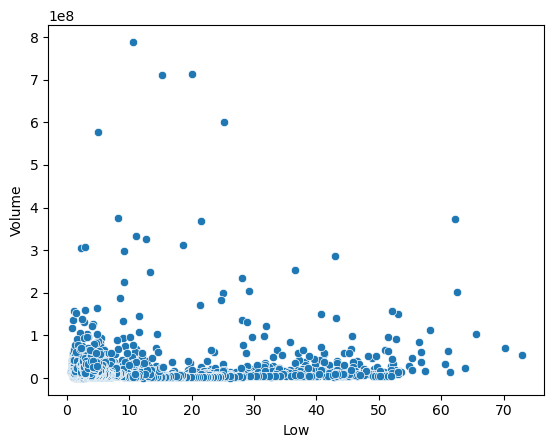

In [9]:
sns.scatterplot(data = df, x = 'Low', y='Volume')

In [10]:
 df['Low'].corr(df['Volume'])

0.10259646883179026

There is almost no correlation between Volume and the Lowest price of stocks sold that day. The direction looks positive.

<Axes: xlabel='Date', ylabel='High'>

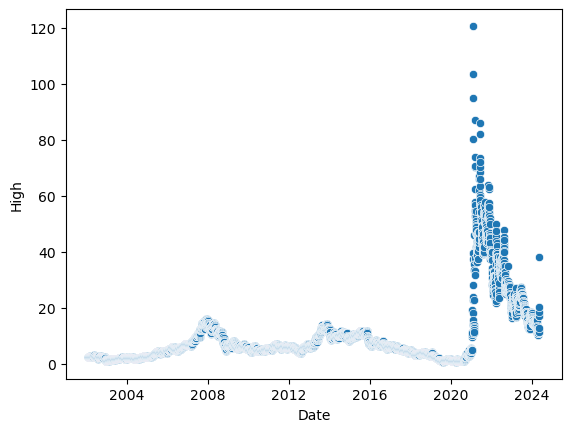

In [12]:
sns.scatterplot(data = df, y = 'High', x='Date')

In [13]:
log_high = np.log1p(df['High'])

In [14]:
log_dateint = np.log1p(df['date_int'])

In [15]:
df['log_high'] = log_high

In [16]:
df['log_dateint'] = log_dateint

<Axes: xlabel='log_dateint', ylabel='log_high'>

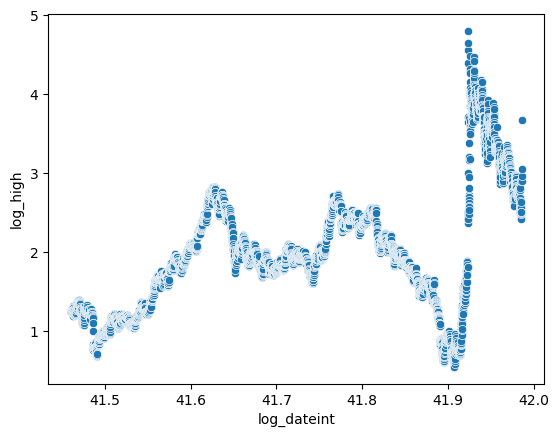

In [17]:
sns.scatterplot(data = df, x = 'log_dateint', y='log_high')

In [18]:
 np.log1p(df['High']).corr(np.log1p(df['date_int']))

0.47823923721402195

There is a weak positive relationship between the date and the highest price on that date.

In [20]:
df[df['date_int']== df['date_int'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume,date_int,log_high,log_dateint
5599,2024-05-13,26.34,38.200001,24.77,30.450001,30.450001,182308700,1715558400000000000,3.668677,41.98627
